In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Global+Superstore+Data.csv')
data.head(12)

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200
5,28-06-2013,Corporate,APAC,2862.675,763.2750
6,07-11-2011,Consumer,APAC,1822.080,564.8400
7,14-04-2012,Consumer,APAC,5244.840,996.4800
8,14-10-2014,Corporate,US,5083.960,1906.4850
9,28-01-2012,Consumer,US,4297.644,-1862.3124


In [3]:
data.tail()

,Order Date,Segment,Market,Sales,Profit
51285,19-06-2014,Corporate,APAC,65.100,4.5000
51286,20-06-2014,Consumer,US,0.444,-1.1100
51287,02-12-2013,Home Office,US,22.920,11.2308
51288,18-02-2012,Home Office,LATAM,13.440,2.4000
51289,22-05-2012,Consumer,LATAM,61.380,1.8000


In [4]:
data.shape

(51290, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [6]:
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [7]:
data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


##DATA PREPRATION

In [8]:
data['Market_Segment'] = data['Market']+'_'+data['Segment']
data.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [9]:
data.nunique().sort_values()

Segment               3
Market                7
Market_Segment       21
Order Date         1430
Sales             22995
Profit            24575
dtype: int64

#### store caters to 7 diff. geographical market segments and 3 major customer segments

#### 21 unique Market_segments

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


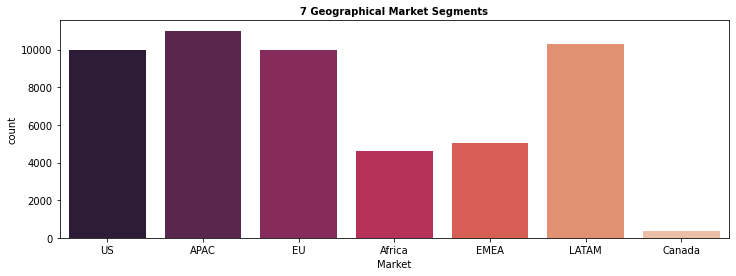

In [10]:
plt.figure(figsize=(12,4))
print(data.Market.value_counts())
sns.countplot(data['Market'], palette='rocket')
plt.title('7 Geographical Market Segments', fontweight='bold', size=10)
plt.show()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


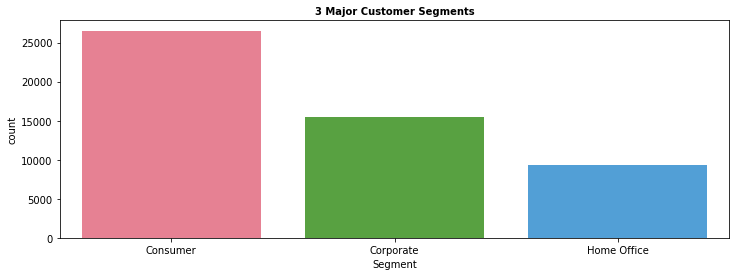

In [11]:
plt.figure(figsize=(12,4))
print(data.Segment.value_counts())
sns.countplot(data['Segment'], palette='husl')
plt.title('3 Major Customer Segments', fontweight='bold', size=10)
plt.show()

APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: Market_Segment, dtype: int64


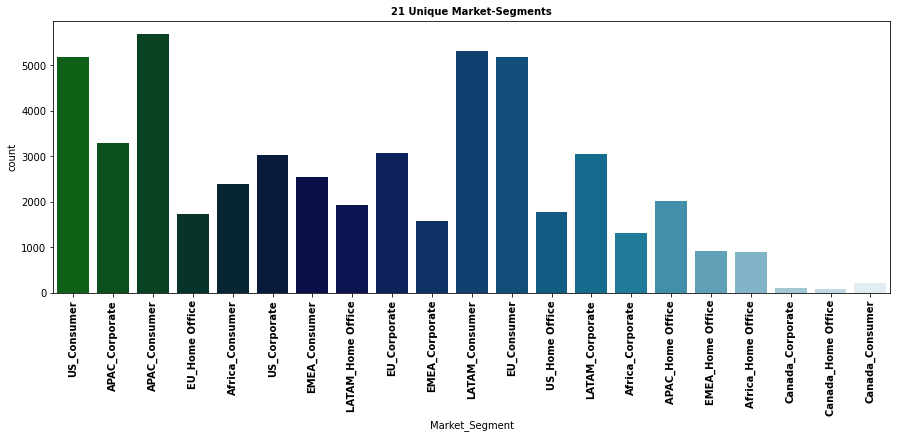

In [12]:
plt.figure(figsize=(15,5))
print(data.Market_Segment.value_counts())
sns.countplot(data['Market_Segment'], palette='ocean')
plt.title('21 Unique Market-Segments', fontweight='bold', size=10)
plt.xticks(rotation=90, fontweight='bold')
plt.show()

###APAC_Consumer has highest count




## Market-Segments vs profit

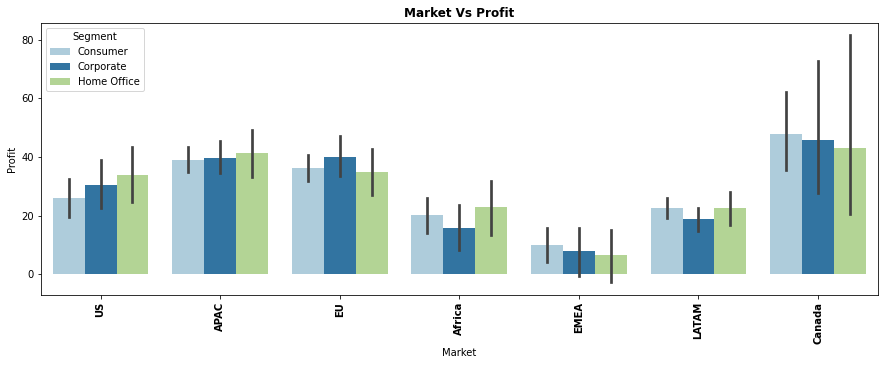

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x='Market', y='Profit', hue='Segment', data=data, palette='Paired')
plt.title('Market Vs Profit', fontweight='bold')
plt.xticks(rotation=90, fontweight='bold')
plt.show()

#### We can see that Canada and APAC markets with the segments Consumer, Corporate and Home office have more profit
#### Africa and EMEA markets have less profit

####MARKET_SEG VS SALES

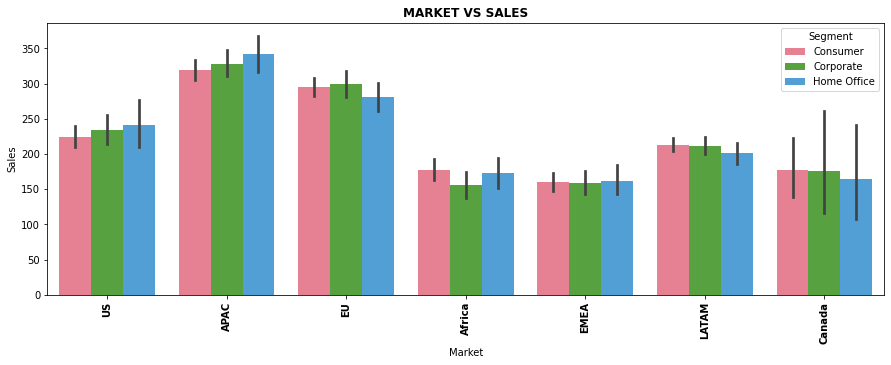

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x='Market', y='Sales', hue='Segment', data=data, palette='husl')
plt.title('MARKET VS SALES', fontweight='bold')
plt.xticks(rotation=90, fontweight='bold')
plt.show()


    ### APAC marketis having higher Sales in     ###all the three segments
    #### EMEA and Africa have less sales 

###DROPPING Maket and segment


In [15]:
data = data.drop(['Market','Segment'], axis=1)
data.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


In [16]:
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m')
data = data.sort_values(by=['Order Date'])
data.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 15262 to 541
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Sales           51290 non-null  float64  
 2   Profit          51290 non-null  float64  
 3   Market_Segment  51290 non-null  object   
dtypes: float64(2), object(1), period[M](1)
memory usage: 2.0+ MB


In [19]:
data_profit = data.pivot_table(index='Order Date', values='Profit', columns= 'Market_Segment', aggfunc='sum')
data_profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [21]:
data_profit.shape

(48, 21)

### 48Months of data for 21 Market Segments 

In [22]:
train_len = 42
train = data_profit[0:train_len]

test = data_profit[train_len:]

In [23]:
train.shape

(42, 21)

In [24]:
train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


CoV on profit for each 21 Market Segments on train data 

In [25]:
mean = np.mean(train)
std = np.std(train)

CoV_df = pd.DataFrame(mean)
CoV_df['std'] = std 
CoV_df['CoV'] = std/mean
CoV_df = CoV_df.reset_index()
CoV_df.columns=['Market_Segment', 'Mean','Std','CoV']
CoV_df.sort_values(by='CoV', ascending= True, inplace = True)
CoV_df

,Market_Segment,Mean,Std,CoV
0,APAC_Consumer,4400.894243,2300.457687,0.522725
1,APAC_Corporate,2574.919807,1364.837734,0.530051
12,EU_Consumer,3699.977143,2202.282289,0.595215
15,LATAM_Consumer,2295.555697,1569.632686,0.683770
13,EU_Corporate,2216.299429,1600.336696,0.722076
16,LATAM_Corporate,1122.633016,990.360880,0.882177
14,EU_Home Office,1224.456536,1148.627937,0.938072
2,APAC_Home Office,1511.088314,1523.508658,1.008219
18,US_Consumer,2686.740912,2715.031412,1.010530
19,US_Corporate,1754.199083,1880.200775,1.071829


In [26]:
Lowest_CoV_val = min(CoV_df['CoV'])

Lowest_CoV_val

0.5227250555218103

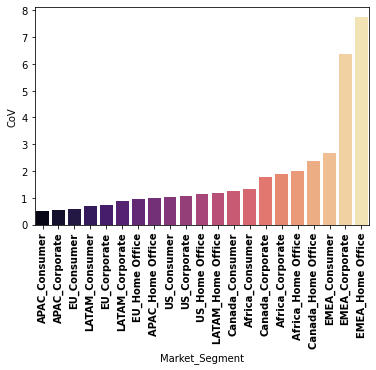

In [27]:
sns.barplot(x='Market_Segment', y='CoV', data=CoV_df, palette='magma')
plt.xticks(rotation=90, fontweight='bold')
plt.show()

### We can see that Lowest CoV is 0.52272
### We can infer that the corresponding Marget Segment is "APAC_Consumer"  ######The most ###profitable Market Segment is APAC_Consumer 





 Convert the Order-Date column from "DateTime" to "timestamp"

In [29]:
data['Order Date'].dtype

period[M]

In [32]:
data['Order Date'] = data['Order Date'].astype(str)
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [33]:
data['Order Date'].dtype

dtype('<M8[ns]')

now we will get timestamp for each data 

filter data for best market seg - apac consumer

In [34]:
#Drop the data for the rest 20 market segments and keep only the one for the market segment 
#that you found to be the most consistently profitable.


data_df = data[(data.Market_Segment=='APAC_Consumer')]
data_df.head()

,Order Date,Sales,Profit,Market_Segment
1080,2011-01-01,1429.050,371.490,APAC_Consumer
9203,2011-01-01,219.780,59.340,APAC_Consumer
19331,2011-01-01,342.510,54.600,APAC_Consumer
26270,2011-01-01,102.762,1.842,APAC_Consumer
14830,2011-01-01,420.420,147.000,APAC_Consumer


In [35]:
data_df.shape

(5699, 4)

In [36]:
data = pd.DataFrame(data_df.groupby('Order Date')['Sales'].sum())
data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [37]:
data.shape

(48, 1)

In [ ]:
###Time series analysis

###Time series analysis

plotting time series analysis

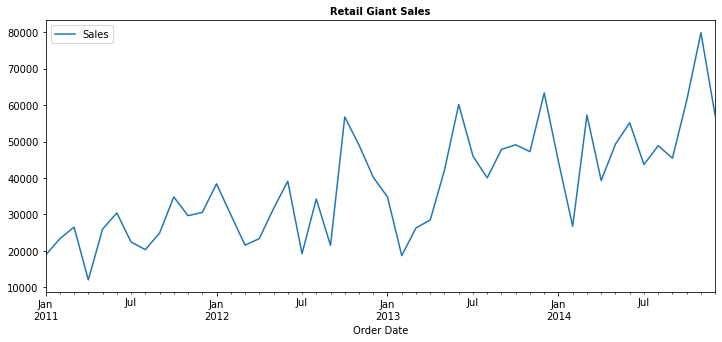

In [38]:
data.plot(figsize=(12,5))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold', size=10)
plt.show(block=False)

In [39]:
data.isnull().sum()

Sales    0
dtype: int64

###no missing values 

spliting time series analysis
into train , test set 

In [40]:
train_len = 42
train = data[0:train_len]
test = data[train_len:]

### 4.3. Time series Decomposition



Lets understand how a time series can be split into its various components that is the Trend, Seasonality, and residuals

    ### Additive seasonal decomposition



The individual components can be added to get the time-series data


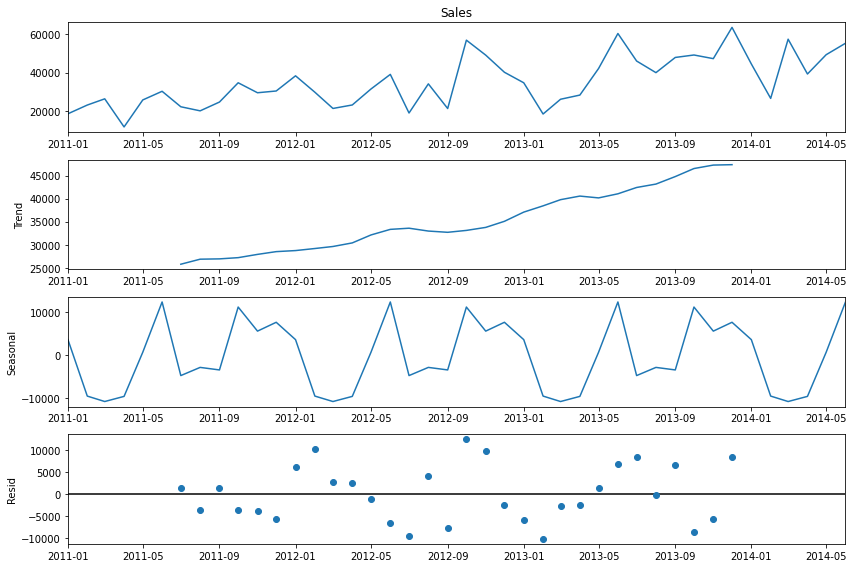

In [43]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(train.Sales ,model='additive') # additive seasonal index
fig= decomposition.plot()
plt.show()



    ### Multiplicative seasonal decomposition

The individual components can be multiplied to get the time-series data


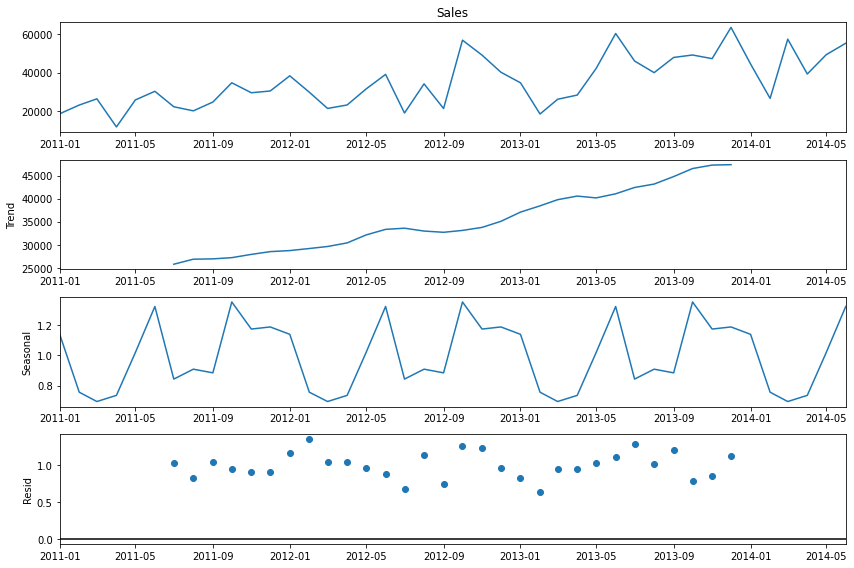

In [45]:
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative')# multiplicative seasonal index
fig = decomposition.plot()
plt.show()

 Build and evaluate time series forecast




Split time series data into training and test set





Perform the train-test split for that market segment that takes the 42 months data as the train data and 
the 6 months data as the test data.

In [47]:
train_len = 42
train = data[0:train_len]
test = data[train_len:]

5.1. Simple time series methods
### Naive Method

Forecast = Last month’s sales


In [48]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]


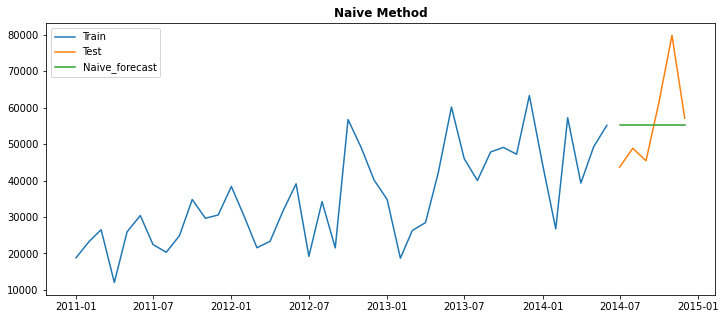

In [50]:
plt.figure(figsize=(12,5))
plt.plot(train['Sales'], label = 'Train')
plt.plot(test['Sales'], label = "Test")
plt.plot(y_hat_naive['naive_forecast'], label='Naive_forecast')
plt.legend(loc='best')
plt.title('Naive Method', fontweight='bold')
plt.show()

#### As we can see in the plot,in order to forecast the sales from month 2014-07 to 2015-01 we we the last or previous month data which is 2014-06
#### We can see that the forecast for the next six months is the same value(green line) as the last observation of the blue line 


Calculate RMSE and MAPE

In [53]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['Naive method'], 'MAPE':[mape],'RMSE':[rmse]})

results = results [['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


### Simple average method

In [55]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

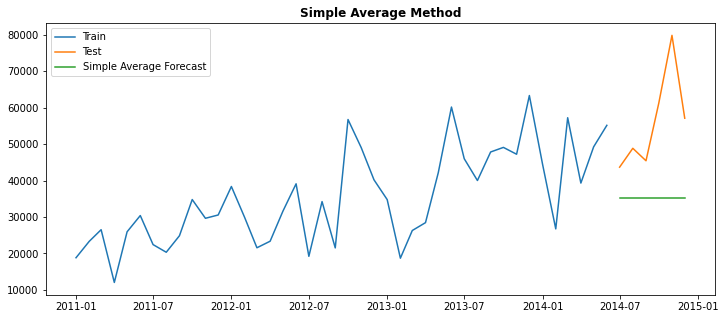

In [56]:
plt.figure(figsize=(12,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label= "Simple Average Forecast")
plt.legend(loc='best')
plt.title('Simple Average Method', fontweight = 'bold')
plt.show()



    #### Forecast of months from 2014-07 to 2015-01 = Average of all past months’ sales
    #### Green line is the average of all the 42 months sales data
    #### The green line we forecasted is not showing any trend or seasonality while our train and test data had both trend and seasonality 

Calculate RMSE and MAPE

In [57]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)

mape = np.round(np.mean(np.abs(test['Sales']- y_hat_avg['avg_forecast'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
